In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


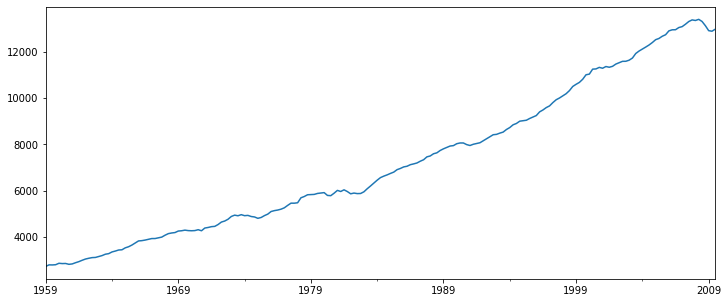

In [5]:
df['realgdp'].plot(figsize=(12,5))

### Importing the Hodrick Prescott Filter 
#### from tsa ---> time Series Analysis.

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [10]:
type(gdp_trend)

pandas.core.series.Series

In [11]:
type(gdp_cycle)

pandas.core.series.Series

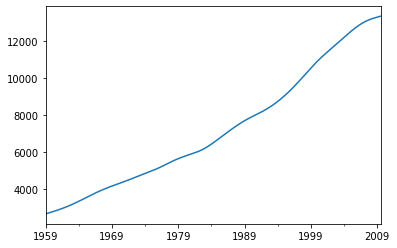

In [12]:
gdp_trend.plot()

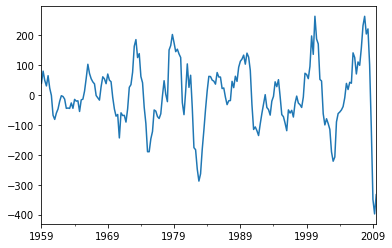

In [13]:
gdp_cycle.plot()

In [14]:
df['trend']=gdp_trend

In [15]:
df['cycle']=gdp_cycle

In [16]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycle
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667


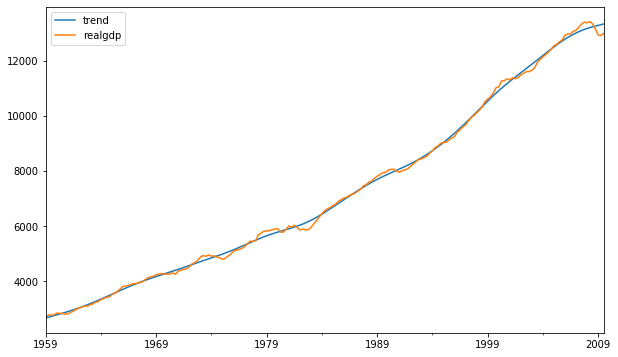

In [22]:
df[['trend','realgdp']].plot(figsize=(10,6))

#### For a particular time span

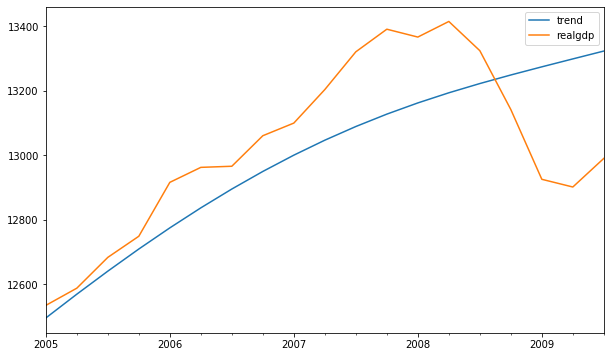

In [23]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(10,6))

## Cycle

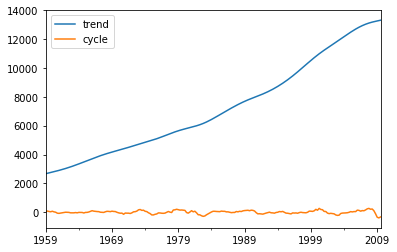

In [18]:
df[['trend','cycle']].plot()

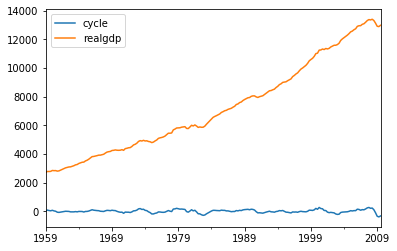

In [20]:
df[['cycle','realgdp']].plot()